### **MA5204: Aprendizaje de Máquinas**
### **Tarea 1 P2**

**Departamento de Ingeniería Matemática, Universidad de Chile**

**Profesor:** Felipe Tobar

**Ayudantes:** Alejandro Cuevas, Mauricio Araneda, Mauricio Romero

**Integrantes:** Daniel Brauer, Dante Cárcamo

**A)**

In [1]:
# importar módulos
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Se cargan los datos a una lista
data = np.genfromtxt("T1_Housing.csv",
                     delimiter=',',
                     skip_header=1)

In [3]:
#X = Avg Area Income
X = data[:,1]

#In = in sample

In_sample = data[:,3]
# Vectores con los valores in-sample y out-sample de X
X_in = X * In_sample
X_out = X - X_in
X_out = X_out[X_out>0]
X_in = X_in[X_in>0]
#Y = Precio de las casas
Y = data[:,2]
# Vectores con los valores in-sample y out-sample de Y
Y_in = Y * In_sample

Y_out = Y - Y_in

Y_in = Y_in[Y_in>0]

Y_out = Y_out[Y_out>0]

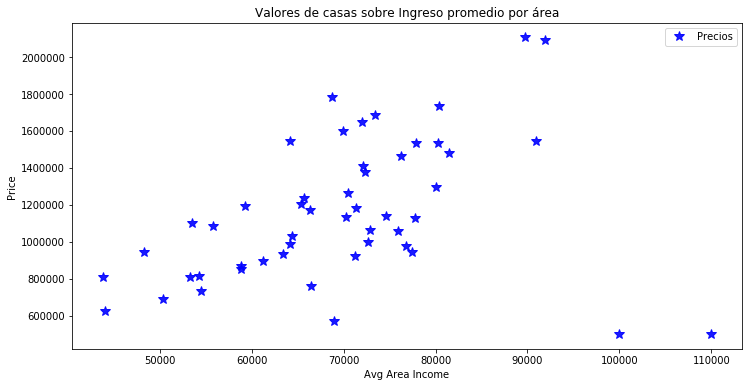

In [4]:
#plot de los valores de Y sobre X
plt.figure(figsize=(12, 6))
plt.plot(X,                     # Datos eje X
         Y,                     # Datos eje y
         c='b',                       # color
         linestyle='',                 # tipo de linea (vacio es sin lineas)
         marker='*',                  # marcador
         ms=10,                       # tamaño de marcador
         alpha=0.9,                   # transparencia
         label="Precios", # etiqueta leyenda
        )
plt.title("Valores de casas sobre Ingreso promedio por área")
plt.ylabel("Price")
plt.xlabel("Avg Area Income")
plt.legend()

# Guarda la imagen (permite guardarla en gráficos vectorizados en .pdf)
plt.savefig('grafico1.jpg',        # nombre archivo
            format='jpg',        # formato
            bbox_inches='tight',  # elimina bordes vacios
           )
plt.show()

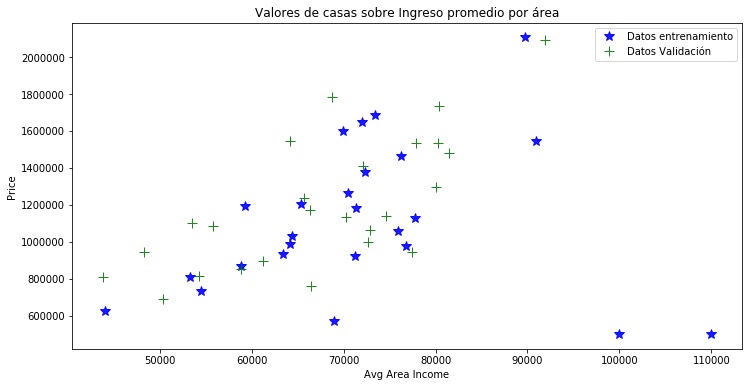

In [5]:
#Plot con los datos separados entre out-sample e in-sample
plt.figure(figsize=(12, 6)) # crea figura y detalla tamaño

#Le pasamos los datos a plotear a matplotlib

plt.plot(X_in,                     # Datos eje X
         Y_in,                     # Datos eje y
         c='b',                       # color
         linestyle='',                 # tipo de linea (vacio es sin lineas)
         marker='*',                  # marcador
         ms=10,                       # tamaño de marcador
         alpha=0.9,                   # transparencia
         label="Datos entrenamiento", # etiqueta leyenda
        )

plt.plot(X_out,                     # Datos eje X
         Y_out,                     # Datos eje y
         c='g',                       # color
         linestyle='',                 # tipo de linea (vacio es sin lineas)
         marker='+',                  # marcador
         ms=10,                       # tamaño de marcador
         alpha=0.9,                   # transparencia
         label="Datos Validación", # etiqueta leyenda
        )
plt.title("Valores de casas sobre Ingreso promedio por área")
plt.ylabel("Price")
plt.xlabel("Avg Area Income")
plt.legend()

# Guarda la imagen (permite guardarla en gráficos vectorizados en .pdf)
plt.savefig('grafico2.jpg',        # nombre archivo
            format='jpg',        # formato
            bbox_inches='tight',  # elimina bordes vacios
           )


plt.show()

**B)**

In [6]:
# Implementación de función reg_lineal(X,Y,rho)
# Devuelve vector de dimensión 2
def reg_lineal(X,Y,rho):
    """Devuelve el vector de parámetros theta utilizando regularización ridge"""
    X1 = np.vstack([X,np.ones_like(X)]).T
    I = np.eye(len(X1.T))
    A = np.linalg.inv(np.dot(X1.T,X1)+(I*rho))
    B = np.dot(X1.T,Y)
    return A.dot(B)  

In [7]:
#se generan vectores "a" y "b"
#estos contienen los valores obtenidos para cada parámetro de theta
#según un rho entre 0 y 10
rho = np.linspace(0 , 10 , 100)
a = np.zeros(len(rho))
b = np.zeros(len(rho))
i=0
for r in rho:
    a[i] = reg_lineal(X_in, Y_in, r)[0]
    b[i] = reg_lineal(X_in, Y_in, r)[1]
    i += 1
#Se construye una matriz de theta que contiene el theta obtenido para cada rho
theta = np.vstack([a,b])

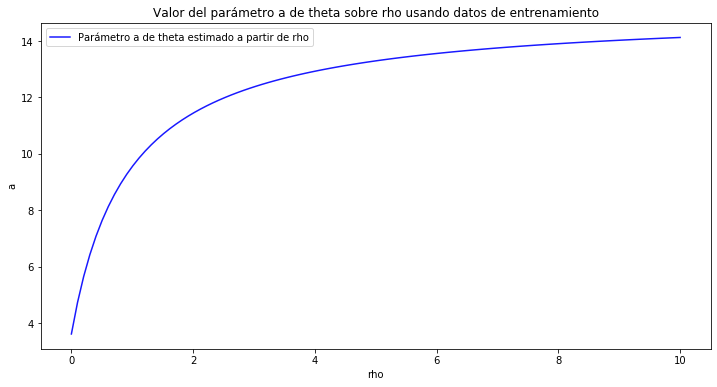

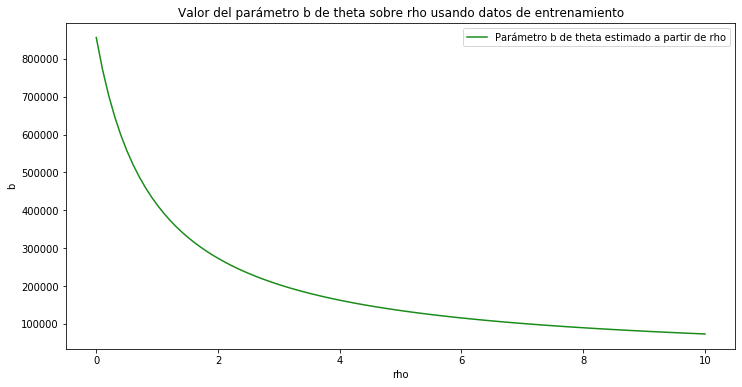

In [8]:
plt.figure(figsize=(12, 6)) # crea figura y detalla tamaño

#Le pasamos los datos a plotear a matplotlib

plt.plot(rho,                     # Datos eje X
         a,                     # Datos eje y
         c='b',                       # color
         linestyle='-',                 # tipo de linea (vacio es sin lineas)
         #marker='*',                  # marcador
         ms=10,                       # tamaño de marcador
         alpha=0.9,                   # transparencia
         label="Parámetro a de theta estimado a partir de rho", # etiqueta leyenda
        )
plt.title("Valor del parámetro a de theta sobre rho usando datos de entrenamiento")
plt.ylabel("a")
plt.xlabel("rho")
plt.legend()
# Guarda la imagen (permite guardarla en gráficos vectorizados en .pdf)
plt.savefig('grafico3.jpg',        # nombre archivo
            format='jpg',        # formato
            bbox_inches='tight',  # elimina bordes vacios
           )
plt.show()
###
plt.figure(figsize=(12, 6))
plt.plot(rho,                     # Datos eje X
         b,                     # Datos eje y
         c='g',                       # color
         linestyle='-',                 # tipo de linea (vacio es sin lineas)
         #marker='+',                  # marcador
         ms=10,                       # tamaño de marcador
         alpha=0.9,                   # transparencia
         label="Parámetro b de theta estimado a partir de rho", # etiqueta leyenda
        )
plt.title("Valor del parámetro b de theta sobre rho usando datos de entrenamiento")
plt.ylabel("b")
plt.xlabel("rho")
plt.legend()
# Guarda la imagen (permite guardarla en gráficos vectorizados en .pdf)
plt.savefig('grafico4.jpg',        # nombre archivo
            format='jpg',        # formato
            bbox_inches='tight',  # elimina bordes vacios
           )
plt.show()

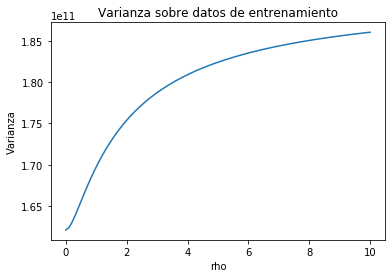

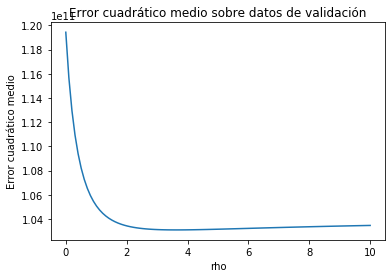

In [9]:
#d)
#Se crea una funcion para calcular el error cuadrático medio
#esta funcion es la misma que se utiliza para calcular la varianza
#lo que cambia es el conjunto de datos sobre el que se trabaja
#En varianza se trabaja se compara la estimación con los datos de 
#entrenamiento, mientras el error cuadrático se compara la estimación
#con los datos de validación.
def error_cuad(x, y, dat_estimacion):
    output = 0
    for i in range(len(x)):
        output += (y[i]-dat_estimacion[0][i])**2
    output = (output/i)
    return output

#Se crea una función que toma los parametros obtenidos de la función r
#reg_lineal y estima los datos según los ptos X dados
def estimacion(X, theta_f, r_arange, n):
    #Creamo el vector ~X
    X1 = np.vstack([X,np.ones_like(X)])
    #Se elige un valor especifico del theta según el valor 
    #de rho que se quiera estudiar
    theta_est1 = np.array([theta_f[0][n],theta_f[1][n]])
    theta_est2 = np.atleast_2d(theta_est1)
    output = theta_est2.dot(X1)
    return output

#Se crea una funcion que entrega un arreglo de errores correspondientes
#a un arreglo de rho
def error_rho(r_arange, theta_f, x, y):
    output = np.zeros(len(r_arange))
    for i in range(len(r_arange)):
        dat_estimacion = estimacion(x, theta_f, r_arange, i)
        output[i] = error_cuad(x, y, dat_estimacion)
    return output   


#calculando finalmente el error cuadrático medio y la varianza
#con las funciones creadas
var = np.asarray(error_rho(rho, theta, X_in, Y_in))
err = np.asarray(error_rho(rho, theta, X_out, Y_out))

#Ploteando los resultados:
plt.plot(rho, var)
plt.title("Varianza sobre datos de entrenamiento")
plt.ylabel("Varianza")
plt.xlabel("rho")
# Guarda la imagen (permite guardarla en gráficos vectorizados en .pdf)
plt.savefig('grafico5.jpg',        # nombre archivo
            format='jpg',        # formato
            bbox_inches='tight',  # elimina bordes vacios
           )
plt.show()

plt.plot(rho, err)
plt.title("Error cuadrático medio sobre datos de validación")
plt.ylabel("Error cuadrático medio")
plt.xlabel("rho")
# Guarda la imagen (permite guardarla en gráficos vectorizados en .pdf)
plt.savefig('grafico6.jpg',        # nombre archivo
            format='jpg',        # formato
            bbox_inches='tight',  # elimina bordes vacios
           )
plt.show()

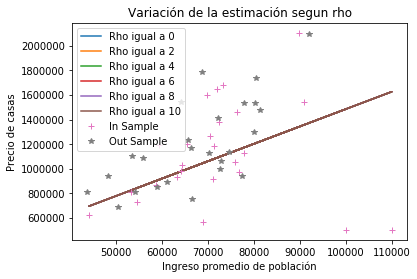

In [10]:
#e)
#Creando 6 rho distintos entre 0 y 10
rho_p = np.linspace(0,10,6)

#Creando los theta correspondientes a estos 6 nuevos rhos
i=0
a_p = np.zeros(len(rho_p))
b_p = np.zeros(len(rho_p))
for valor in rho_p:
    a_p[i] = reg_lineal(X_in, Y_in, r)[0]
    b_p[i] = reg_lineal(X_in, Y_in, r)[1]
    i += 1
theta_p = np.vstack([a_p, b_p])

#Creando una función que recibe rhos distintos como r_arange,
#los theta correspondientes a estos rhos, como theta_f, y un 
#arreglo que representa la variable dependiente con la que se hara las
#predicciones como X, como resultado esta funcion retorna un arreglo de 
#arreglos donde cada uno de estos arreglo contiene la prediccion según X
#para un rho determinado
def conj_estimacion(X, theta_f, r_arange):
    #creando un arreglo que contiene 0s del tipo object
    output=np.zeros(len(r_arange), dtype=object)
    for j in range(len(r_arange)):
        #Remplazando output[j] por la estimacion hecha con r_arange[j]
        output[j] = np.asarray(estimacion(X, theta_f, r_arange, j))
    return output

#Calculando finalmente los datos con la funcion recien creada
conj_estimacion_r=conj_estimacion(X_in, theta_p, rho_p)

#Ploteando los resutlados
line0, = plt.plot(X_in,conj_estimacion_r[0].flatten())
line1, = plt.plot(X_in,conj_estimacion_r[1].flatten())
line2, = plt.plot(X_in,conj_estimacion_r[2].flatten())
line3, = plt.plot(X_in,conj_estimacion_r[3].flatten())
line4, = plt.plot(X_in,conj_estimacion_r[4].flatten())
line5, = plt.plot(X_in,conj_estimacion_r[5].flatten())
line6, = plt.plot(X_in,Y_in,"+")
line7, = plt.plot(X_out,Y_out,"*")
    
plt.legend((line0, line1, line2, line3,
            line4, line5, line6, line7), 
           ("Rho igual a 0", "Rho igual a 2",
            "Rho igual a 4", "Rho igual a 6",
            "Rho igual a 8", "Rho igual a 10",
             "In Sample","Out Sample"))
plt.title("Variación de la estimación segun rho")
plt.xlabel("Ingreso promedio de población")
plt.ylabel("Precio de casas")
# Guarda la imagen (permite guardarla en gráficos vectorizados en .pdf)
plt.savefig('grafico7.jpg',        # nombre archivo
            format='jpg',        # formato
            bbox_inches='tight',  # elimina bordes vacios
           )
plt.show()